Create Dataset

In [1]:
using SyntheticDatasets
using Plots

include("../src/NNJulia.jl")
using .NNJulia

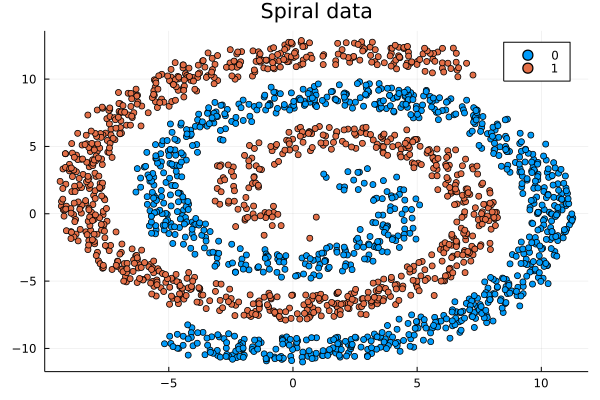

In [2]:
spirals = SyntheticDatasets.make_twospirals(n_samples = 2000, 
                                            start_degrees = 90,
                                            total_degrees = 570, 
                                            noise =1.9);

scatter(spirals.feature_1,spirals.feature_2,group=spirals.label,title="Spiral data")

In [3]:
xData = permutedims([spirals.feature_1 spirals.feature_2]) # 2x2000
yData = permutedims(spirals.label) #1x2000

x_train,y_train,x_test,y_test = split_train_test(xData,yData,0.9)


([-1.3238086126286457 3.9434880402471437 … 1.0419809463332181 -4.9712580329800335; 11.872998260449442 12.292047970644335 … -2.998336551844427 9.886720086778304], [1 1 … 0 1], [-8.836552274115386 -4.517029048856251 … -4.67284362057878 8.69494109122045; -0.05826401176551865 6.584102750343849 … -5.044270718015121 -5.314593779883147], [1 0 … 1 0])

In [4]:
model = Sequential(
        Dense(2, 16, leakyrelu),
        Dense(16, 16, leakyrelu),
        Dense(16, 1, sigmoid),
    )

Sequential with : 3 layer


Dense: 2 --> 16
weight: (16, 2)
bias: (16,)
activation function: leakyrelu
Dense: 16 --> 16
weight: (16, 16)
bias: (16,)
activation function: leakyrelu
Dense: 16 --> 1
weight: (1, 16)
bias: (1,)
activation function: sigmoid


In [5]:
opt = GradientDescent(0.01)
loss = BinaryCrossentropy()
metrics = BinaryAccuracy(0.8)

trainParams = TrainParameters(opt, loss, metrics)

batchsize = 64
nbEpochs = 400

400

In [6]:
trainData = DataLoader(x_train, y_train, batchsize,true)

DataLoader{Union{Float64, Int64, AbstractArray}, Union{Float64, Int64, AbstractArray}}([-1.3238086126286457 3.9434880402471437 … 1.0419809463332181 -4.9712580329800335; 11.872998260449442 12.292047970644335 … -2.998336551844427 9.886720086778304], [1 1 … 0 1], 64, [1, 65, 129, 193, 257, 321, 385, 449, 513, 577  …  1217, 1281, 1345, 1409, 1473, 1537, 1601, 1665, 1729, 1793], true, 29)

In [7]:
train!(model, trainParams, trainData, nbEpochs)

Epoch 1 : accuracy = 0.5323275862068966, loss = 81.83113387062147
Epoch 2 : accuracy = 0.5474137931034483, loss = 22.496536338896124
Epoch 3 : accuracy = 0.5118534482758621, loss = 20.894395013821754
Epoch 4 : accuracy = 0.5091594827586207, loss = 20.43463074426013
Epoch 5 : accuracy = 0.4973060344827586, loss = 20.170124457706923
Epoch 6 : accuracy = 0.5296336206896551, loss = 19.77055061618313
Epoch 7 : accuracy = 0.5048491379310345, loss = 19.651126784931503
Epoch 8 : accuracy = 0.5269396551724138, loss = 19.556217921085302
Epoch 9 : accuracy = 0.5344827586206896, loss = 19.23097744452404
Epoch 10 : accuracy = 0.525323275862069, loss = 19.323853536964858
Epoch 11 : accuracy = 0.5484913793103449, loss = 18.831762787791398
Epoch 12 : accuracy = 0.5474137931034483, loss = 18.806501461795015
Epoch 13 : accuracy = 0.5398706896551724, loss = 18.88671186682573


Epoch 14 : accuracy = 0.5452586206896551, loss = 18.683702966493044
Epoch 15 : accuracy = 0.5511853448275862, loss = 18.536870310047735
Epoch 16 : accuracy = 0.5501077586206896, loss = 18.31903515414782
Epoch 17 : accuracy = 0.5479525862068966, loss = 18.42097769092627
Epoch 18 : accuracy = 0.5614224137931034, loss = 18.332386509686287
Epoch 19 : accuracy = 0.5603448275862069, loss = 18.12601953325314
Epoch 20 : accuracy = 0.5571120689655172, loss = 18.238371053700764
Epoch 21 : accuracy = 0.5630387931034483, loss = 18.032293451330457
Epoch 22 : accuracy = 0.5673491379310345, loss = 18.109892874331422
Epoch 23 : accuracy = 0.5700431034482759, loss = 17.878839702241855
Epoch 24 : accuracy = 0.5705818965517241, loss = 17.843536913147428
Epoch 25 : accuracy = 0.5668103448275862, loss = 17.786406111007278
Epoch 26 : accuracy = 0.5716594827586207, loss = 17.70763031356843
Epoch 27 : accuracy = 0.5743534482758621, loss = 17.757363723229567
Epoch 28 : accuracy = 0.5851293103448276, loss = 17.

Epoch 30 : accuracy = 0.5835129310344828, loss = 17.67008574652816
Epoch 31 : accuracy = 0.5765086206896551, loss = 17.53085618802434
Epoch 32 : accuracy = 0.5899784482758621, loss = 17.451825507085545
Epoch 33 : accuracy = 0.5824353448275862, loss = 17.418179328744266
Epoch 34 : accuracy = 0.5980603448275862, loss = 17.352518307295586
Epoch 35 : accuracy = 0.5797413793103449, loss = 17.419179484321926
Epoch 36 : accuracy = 0.5808189655172413, loss = 17.32412045083511
Epoch 37 : accuracy = 0.6061422413793104, loss = 17.220730378751366
Epoch 38 : accuracy = 0.5889008620689655, loss = 17.288851761537547
Epoch 39 : accuracy = 0.5856681034482759, loss = 17.156122582793515
Epoch 40 : accuracy = 0.5910560344827587, loss = 17.167986491559642
Epoch 41 : accuracy = 0.6039870689655172, loss = 17.144630711166492
Epoch 42 : accuracy = 0.6050646551724138, loss = 16.97085638641014
Epoch 43 : accuracy = 0.5856681034482759, loss = 17.100190022247983
Epoch 44 : accuracy = 0.5942887931034483, loss = 16.

Epoch 45 : accuracy = 0.6012931034482759, loss = 16.950391906104244
Epoch 46 : accuracy = 0.5942887931034483, loss = 16.88059552146342
Epoch 47 : accuracy = 0.6023706896551724, loss = 16.983181260611552
Epoch 48 : accuracy = 0.609375, loss = 16.817946414795017
Epoch 49 : accuracy = 0.6045258620689655, loss = 16.830892873110464
Epoch 50 : accuracy = 0.5942887931034483, loss = 16.8107020519602
Epoch 51 : accuracy = 0.6012931034482759, loss = 16.812400539648905
Epoch 52 : accuracy = 0.6061422413793104, loss = 16.750431509418092
Epoch 53 : accuracy = 0.6061422413793104, loss = 16.753835440369485
Epoch 54 : accuracy = 0.6109913793103449, loss = 16.64250207799027
Epoch 55 : accuracy = 0.6082974137931034, loss = 16.571823397655518
Epoch 56 : accuracy = 0.6163793103448276, loss = 16.544962036298482
Epoch 57 : accuracy = 0.6185344827586207, loss = 16.633165771451257
Epoch 58 : accuracy = 0.6158405172413793, loss = 16.47097892526815
Epoch 59 : accuracy = 0.6099137931034483, loss = 16.51365317053

Epoch 61 : accuracy = 0.625, loss = 16.39935414218551
Epoch 62 : accuracy = 0.6169181034482759, loss = 16.342083125078048
Epoch 63 : accuracy = 0.6276939655172413, loss = 16.25170128689002
Epoch 64 : accuracy = 0.6260775862068966, loss = 16.31335559515234
Epoch 65 : accuracy = 0.6239224137931034, loss = 16.294921802943676
Epoch 66 : accuracy = 0.6303879310344828, loss = 16.236465518556447
Epoch 67 : accuracy = 0.634698275862069, loss = 16.08506983772815
Epoch 68 : accuracy = 0.6239224137931034, loss = 16.092753064963887
Epoch 69 : accuracy = 0.6303879310344828, loss = 16.10668303391668
Epoch 70 : accuracy = 0.6260775862068966, loss = 16.02674449403615
Epoch 71 : accuracy = 0.6481681034482759, loss = 15.975902496186485
Epoch 72 : accuracy = 0.640625, loss = 15.969353686954973
Epoch 73 : accuracy = 0.6314655172413793, loss = 15.96432513554798
Epoch 74 : accuracy = 0.630926724137931, loss = 15.91062013152249
Epoch 75 : accuracy = 0.6384698275862069, loss = 15.860752990445588
Epoch 76 : ac

Epoch 77 : accuracy = 0.6400862068965517, loss = 15.756377452529934
Epoch 78 : accuracy = 0.6320043103448276, loss = 15.785059474041054
Epoch 79 : accuracy = 0.6341594827586207, loss = 15.668192482579922
Epoch 80 : accuracy = 0.6481681034482759, loss = 15.703984791970084
Epoch 81 : accuracy = 0.6417025862068966, loss = 15.630778676804495
Epoch 82 : accuracy = 0.6352370689655172, loss = 15.553530118102026
Epoch 83 : accuracy = 0.6400862068965517, loss = 15.553346871908968
Epoch 84 : accuracy = 0.6368534482758621, loss = 15.50435188305957
Epoch 85 : accuracy = 0.6325431034482759, loss = 15.422759830712335
Epoch 86 : accuracy = 0.6454741379310345, loss = 15.463445245471885
Epoch 87 : accuracy = 0.650323275862069, loss = 15.342880888816161
Epoch 88 : accuracy = 0.6287715517241379, loss = 15.35204195212588
Epoch 89 : accuracy = 0.646551724137931, loss = 15.21050021125609
Epoch 90 : accuracy = 0.6379310344827587, loss = 15.270649920340956
Epoch 91 : accuracy = 0.6379310344827587, loss = 15.0

Epoch 93 : accuracy = 0.6384698275862069, loss = 15.071982093808431
Epoch 94 : accuracy = 0.6438577586206896, loss = 14.985012815413484
Epoch 95 : accuracy = 0.6443965517241379, loss = 15.014094781851748
Epoch 96 : accuracy = 0.65625, loss = 14.962729105715876
Epoch 97 : accuracy = 0.6373922413793104, loss = 14.92485666442623
Epoch 98 : accuracy = 0.6567887931034483, loss = 14.789618183000472
Epoch 99 : accuracy = 0.6390086206896551, loss = 14.751373686718653
Epoch 100 : accuracy = 0.6417025862068966, loss = 14.687588181432938
Epoch 101 : accuracy = 0.6535560344827587, loss = 14.705498162084057
Epoch 102 : accuracy = 0.6492456896551724, loss = 14.587337966768267
Epoch 103 : accuracy = 0.6540948275862069, loss = 14.46084971427414
Epoch 104 : accuracy = 0.6530172413793104, loss = 14.538411199865566
Epoch 105 : accuracy = 0.6540948275862069, loss = 14.387170770804122
Epoch 106 : accuracy = 0.6567887931034483, loss = 14.251457563084145
Epoch 107 : accuracy = 0.6557112068965517, loss = 14.2

Epoch 108 : accuracy = 0.662176724137931, loss = 14.065454538434532
Epoch 109 : accuracy = 0.6600215517241379, loss = 14.038441136142211
Epoch 110 : accuracy = 0.6610991379310345, loss = 14.090634620801557
Epoch 111 : accuracy = 0.6632543103448276, loss = 13.83054828193698
Epoch 112 : accuracy = 0.6681034482758621, loss = 13.76470242152078
Epoch 113 : accuracy = 0.6648706896551724, loss = 13.806069460642975
Epoch 114 : accuracy = 0.665948275862069, loss = 13.682676576184864
Epoch 115 : accuracy = 0.6681034482758621, loss = 13.583422067839262
Epoch 116 : accuracy = 0.6772629310344828, loss = 13.46524949964065
Epoch 117 : accuracy = 0.6627155172413793, loss = 13.392466651006094
Epoch 118 : accuracy = 0.6643318965517241, loss = 13.388000279357307
Epoch 119 : accuracy = 0.671875, loss = 13.346275624352867
Epoch 120 : accuracy = 0.6702586206896551, loss = 13.193447287651416
Epoch 121 : accuracy = 0.6729525862068966, loss = 13.243081254508851
Epoch 122 : accuracy = 0.6734913793103449, loss =

Epoch 124 : accuracy = 0.6751077586206896, loss = 13.093311080231816
Epoch 125 : accuracy = 0.6788793103448276, loss = 12.900802762129155
Epoch 126 : accuracy = 0.6799568965517241, loss = 12.86719299733107
Epoch 127 : accuracy = 0.6821120689655172, loss = 12.754901143543378
Epoch 128 : accuracy = 0.6772629310344828, loss = 12.602562694927993
Epoch 129 : accuracy = 0.6869612068965517, loss = 12.62020421140367
Epoch 130 : accuracy = 0.6799568965517241, loss = 12.664777789156112
Epoch 131 : accuracy = 0.6853448275862069, loss = 12.404298596922773
Epoch 132 : accuracy = 0.6875, loss = 12.525469996404107
Epoch 133 : accuracy = 0.6901939655172413, loss = 12.265690074460302
Epoch 134 : accuracy = 0.6799568965517241, loss = 12.201877605295445
Epoch 135 : accuracy = 0.6821120689655172, loss = 12.394533696956174
Epoch 136 : accuracy = 0.6853448275862069, loss = 12.291249824179115
Epoch 137 : accuracy = 0.6912715517241379, loss = 12.114715036703908
Epoch 138 : accuracy = 0.6918103448275862, loss 

Epoch 140 : accuracy = 0.6923491379310345, loss = 11.726134215114572
Epoch 141 : accuracy = 0.6912715517241379, loss = 11.567113796765021
Epoch 142 : accuracy = 0.7020474137931034, loss = 11.573821375521442
Epoch 143 : accuracy = 0.6988146551724138, loss = 11.39683755077042
Epoch 144 : accuracy = 0.7025862068965517, loss = 11.241664611429181
Epoch 145 : accuracy = 0.6988146551724138, loss = 11.162467843299638
Epoch 146 : accuracy = 0.6993534482758621, loss = 11.151284584285674
Epoch 147 : accuracy = 0.6955818965517241, loss = 10.965330551521738
Epoch 148 : accuracy = 0.7052801724137931, loss = 11.009679451571314
Epoch 149 : accuracy = 0.7004310344827587, loss = 10.88822937305517
Epoch 150 : accuracy = 0.7036637931034483, loss = 10.695463682045043
Epoch 151 : accuracy = 0.7058189655172413, loss = 10.560428661914138
Epoch 152 : accuracy = 0.7079741379310345, loss = 10.52262472336865
Epoch 153 : accuracy = 0.7095905172413793, loss = 10.516838386435174
Epoch 154 : accuracy = 0.709590517241

Epoch 156 : accuracy = 0.7149784482758621, loss = 10.254464383321562
Epoch 157 : accuracy = 0.7144396551724138, loss = 10.182504217778526
Epoch 158 : accuracy = 0.7101293103448276, loss = 10.134478176246256
Epoch 159 : accuracy = 0.7117456896551724, loss = 9.932978174204607
Epoch 160 : accuracy = 0.7122844827586207, loss = 9.88015554167771
Epoch 161 : accuracy = 0.7139008620689655, loss = 9.884111397076838
Epoch 162 : accuracy = 0.7085129310344828, loss = 9.839092439742501
Epoch 163 : accuracy = 0.7182112068965517, loss = 9.637696439417402
Epoch 164 : accuracy = 0.7112068965517241, loss = 9.627172138269488
Epoch 165 : accuracy = 0.7149784482758621, loss = 9.474085456732146
Epoch 166 : accuracy = 0.7160560344827587, loss = 9.271353067104283
Epoch 167 : accuracy = 0.7230603448275862, loss = 9.357359451599708
Epoch 168 : accuracy = 0.7203663793103449, loss = 9.211924424639838
Epoch 169 : accuracy = 0.724676724137931, loss = 9.018466427129088
Epoch 170 : accuracy = 0.7332974137931034, loss

Epoch 173 : accuracy = 0.7397629310344828, loss = 8.556313248678304
Epoch 174 : accuracy = 0.7316810344827587, loss = 8.582788504978994
Epoch 175 : accuracy = 0.740301724137931, loss = 8.40028041966945
Epoch 176 : accuracy = 0.7424568965517241, loss = 8.467027559394216
Epoch 177 : accuracy = 0.7494612068965517, loss = 8.16451066169643
Epoch 178 : accuracy = 0.7505387931034483, loss = 8.103243734754534
Epoch 179 : accuracy = 0.7543103448275862, loss = 8.267826849189126
Epoch 180 : accuracy = 0.7575431034482759, loss = 7.897057762072321
Epoch 181 : accuracy = 0.7570043103448276, loss = 8.002788825969139
Epoch 182 : accuracy = 0.7688577586206896, loss = 7.691824742628465
Epoch 183 : accuracy = 0.7645474137931034, loss = 7.829198961181318
Epoch 184 : accuracy = 0.7645474137931034, loss = 7.775409862463036
Epoch 185 : accuracy = 0.7661637931034483, loss = 7.85904348071971
Epoch 186 : accuracy = 0.7747844827586207, loss = 7.370226999416547
Epoch 187 : accuracy = 0.7769396551724138, loss = 7.

Epoch 189 : accuracy = 0.78125, loss = 7.166599541769746
Epoch 190 : accuracy = 0.7850215517241379, loss = 7.307155680583785
Epoch 191 : accuracy = 0.7823275862068966, loss = 7.087185219192511
Epoch 192 : accuracy = 0.7882543103448276, loss = 7.064221288324562
Epoch 193 : accuracy = 0.7877155172413793, loss = 6.9229327467860955
Epoch 194 : accuracy = 0.8006465517241379, loss = 7.0112660769094495
Epoch 195 : accuracy = 0.7893318965517241, loss = 7.148940972486819
Epoch 196 : accuracy = 0.7979525862068966, loss = 6.888765005615802
Epoch 197 : accuracy = 0.8017241379310345, loss = 6.794480016033183
Epoch 198 : accuracy = 0.8081896551724138, loss = 6.624553025843541
Epoch 199 : accuracy = 0.8114224137931034, loss = 6.730462265422635
Epoch 200 : accuracy = 0.7963362068965517, loss = 6.817853831320914
Epoch 201 : accuracy = 0.8108836206896551, loss = 6.861111129433725
Epoch 202 : accuracy = 0.8168103448275862, loss = 6.264962996968036
Epoch 203 : accuracy = 0.8125, loss = 6.315072197309808
E

Epoch 205 : accuracy = 0.8254310344827587, loss = 6.237914178949061
Epoch 206 : accuracy = 0.8248922413793104, loss = 6.285271203971811
Epoch 207 : accuracy = 0.8119612068965517, loss = 6.191701428298679
Epoch 208 : accuracy = 0.8254310344827587, loss = 6.301759878994469
Epoch 209 : accuracy = 0.8292025862068966, loss = 6.130895220143294
Epoch 210 : accuracy = 0.8318965517241379, loss = 5.967818754124501
Epoch 211 : accuracy = 0.8335129310344828, loss = 5.935308120382639
Epoch 212 : accuracy = 0.84375, loss = 5.7681698298039725
Epoch 213 : accuracy = 0.8345905172413793, loss = 6.0267592014474385
Epoch 214 : accuracy = 0.8432112068965517, loss = 5.659671029480225
Epoch 215 : accuracy = 0.8383620689655172, loss = 5.813036227527515
Epoch 216 : accuracy = 0.8485991379310345, loss = 5.677994292143198
Epoch 217 : accuracy = 0.8539870689655172, loss = 5.687793395326058
Epoch 218 : accuracy = 0.853448275862069, loss = 5.443574303936651
Epoch 219 : accuracy = 0.8502155172413793, loss = 5.379824

Epoch 221 : accuracy = 0.8609913793103449, loss = 5.324209663019582
Epoch 222 : accuracy = 0.8609913793103449, loss = 5.3163175844231985
Epoch 223 : accuracy = 0.8475215517241379, loss = 5.697258090349074
Epoch 224 : accuracy = 0.8604525862068966, loss = 5.290135358190158
Epoch 225 : accuracy = 0.8636853448275862, loss = 5.14236628663558
Epoch 226 : accuracy = 0.8620689655172413, loss = 5.214590974742462
Epoch 227 : accuracy = 0.8642241379310345, loss = 5.270979385821567
Epoch 228 : accuracy = 0.8739224137931034, loss = 4.998409758835439
Epoch 229 : accuracy = 0.865301724137931, loss = 5.018967223402319
Epoch 230 : accuracy = 0.8696120689655172, loss = 4.971737736010096
Epoch 231 : accuracy = 0.8696120689655172, loss = 4.953535589394449
Epoch 232 : accuracy = 0.8728448275862069, loss = 4.972178595019415
Epoch 233 : accuracy = 0.8760775862068966, loss = 4.844055729260579
Epoch 234 : accuracy = 0.8766163793103449, loss = 4.7909207265547336
Epoch 235 : accuracy = 0.8776939655172413, loss 

Epoch 238 : accuracy = 0.8803879310344828, loss = 4.651664264522045
Epoch 239 : accuracy = 0.8820043103448276, loss = 4.819112394800449
Epoch 240 : accuracy = 0.8787715517241379, loss = 4.768821027310152
Epoch 241 : accuracy = 0.8814655172413793, loss = 4.650612098878633
Epoch 242 : accuracy = 0.8868534482758621, loss = 4.543014038138282
Epoch 243 : accuracy = 0.8825431034482759, loss = 4.584980794427635
Epoch 244 : accuracy = 0.8933189655172413, loss = 4.45770371438631
Epoch 245 : accuracy = 0.8927801724137931, loss = 4.5140413503235095
Epoch 246 : accuracy = 0.8836206896551724, loss = 4.355260102761043
Epoch 247 : accuracy = 0.8938577586206896, loss = 4.293258935739249
Epoch 248 : accuracy = 0.8879310344827587, loss = 4.4505238869738495
Epoch 249 : accuracy = 0.8922413793103449, loss = 4.310770188666131
Epoch 250 : accuracy = 0.8997844827586207, loss = 4.216938235688739
Epoch 251 : accuracy = 0.8943965517241379, loss = 4.259032953650546
Epoch 252 : accuracy = 0.8981681034482759, loss

Epoch 254 : accuracy = 0.8981681034482759, loss = 4.23755973317104
Epoch 255 : accuracy = 0.896551724137931, loss = 4.131243365155203
Epoch 256 : accuracy = 0.9057112068965517, loss = 4.065952419403591
Epoch 257 : accuracy = 0.9019396551724138, loss = 4.097399517670647
Epoch 258 : accuracy = 0.9051724137931034, loss = 4.0364435513865615
Epoch 259 : accuracy = 0.9035560344827587, loss = 3.999821492847684
Epoch 260 : accuracy = 0.900323275862069, loss = 4.043693187407508
Epoch 261 : accuracy = 0.9051724137931034, loss = 3.8920842392809667
Epoch 262 : accuracy = 0.9040948275862069, loss = 3.9596066179917857
Epoch 263 : accuracy = 0.9073275862068966, loss = 3.913945163685486
Epoch 264 : accuracy = 0.9089439655172413, loss = 3.768297787449266
Epoch 265 : accuracy = 0.9067887931034483, loss = 3.7705062311391617
Epoch 266 : accuracy = 0.9089439655172413, loss = 3.742661507355204
Epoch 267 : accuracy = 0.9089439655172413, loss = 3.7800897359822314
Epoch 268 : accuracy = 0.9164870689655172, los

Epoch 270 : accuracy = 0.9089439655172413, loss = 3.805643133471595
Epoch 271 : accuracy = 0.9110991379310345, loss = 3.669093381977896
Epoch 272 : accuracy = 0.9170258620689655, loss = 3.6222494602851594
Epoch 273 : accuracy = 0.9186422413793104, loss = 3.5507508963466616
Epoch 274 : accuracy = 0.9191810344827587, loss = 3.548346610442652
Epoch 275 : accuracy = 0.9148706896551724, loss = 3.5685502947152106
Epoch 276 : accuracy = 0.9186422413793104, loss = 3.4428011549188167
Epoch 277 : accuracy = 0.9143318965517241, loss = 3.582459796919649
Epoch 278 : accuracy = 0.921875, loss = 3.4185790757355194
Epoch 279 : accuracy = 0.9224137931034483, loss = 3.4366869409736593
Epoch 280 : accuracy = 0.9207974137931034, loss = 3.4626092906795676
Epoch 281 : accuracy = 0.9234913793103449, loss = 3.3842031621548854
Epoch 282 : accuracy = 0.9224137931034483, loss = 3.409645283350828
Epoch 283 : accuracy = 0.9251077586206896, loss = 3.2357151267336066
Epoch 284 : accuracy = 0.9234913793103449, loss =

Epoch 286 : accuracy = 0.9197198275862069, loss = 3.4388977809154095
Epoch 287 : accuracy = 0.921875, loss = 3.2215452750472284
Epoch 288 : accuracy = 0.9240301724137931, loss = 3.2135542312895695
Epoch 289 : accuracy = 0.931573275862069, loss = 3.1614968952223803
Epoch 290 : accuracy = 0.9240301724137931, loss = 3.145462731996256
Epoch 291 : accuracy = 0.9348060344827587, loss = 3.149164998011388
Epoch 292 : accuracy = 0.9283405172413793, loss = 3.116750766845256
Epoch 293 : accuracy = 0.9310344827586207, loss = 3.0838078709729837
Epoch 294 : accuracy = 0.9256465517241379, loss = 3.088746447394222
Epoch 295 : accuracy = 0.9321120689655172, loss = 3.071237264600214
Epoch 296 : accuracy = 0.9283405172413793, loss = 3.1301532659362707
Epoch 297 : accuracy = 0.9321120689655172, loss = 3.048196836232511
Epoch 298 : accuracy = 0.927801724137931, loss = 3.0056037969791944
Epoch 299 : accuracy = 0.9283405172413793, loss = 3.0088821245791015
Epoch 300 : accuracy = 0.9331896551724138, loss = 2.

Epoch 303 : accuracy = 0.9358836206896551, loss = 2.887476998512609
Epoch 304 : accuracy = 0.9310344827586207, loss = 2.9093114894513956
Epoch 305 : accuracy = 0.9261853448275862, loss = 3.1042332981743384
Epoch 306 : accuracy = 0.9342672413793104, loss = 2.8189579034075303
Epoch 307 : accuracy = 0.9321120689655172, loss = 2.913920566505232
Epoch 308 : accuracy = 0.9348060344827587, loss = 2.836225526043166
Epoch 309 : accuracy = 0.9364224137931034, loss = 2.7707737542816213
Epoch 310 : accuracy = 0.9385775862068966, loss = 2.8280917458501365
Epoch 311 : accuracy = 0.9326508620689655, loss = 2.800297858774691
Epoch 312 : accuracy = 0.9391163793103449, loss = 2.7514722133624985
Epoch 313 : accuracy = 0.9369612068965517, loss = 2.7292517740355375
Epoch 314 : accuracy = 0.9321120689655172, loss = 2.7317461615496685
Epoch 315 : accuracy = 0.9418103448275862, loss = 2.7453407143669257
Epoch 316 : accuracy = 0.9396551724137931, loss = 2.7524154760375987
Epoch 317 : accuracy = 0.9358836206896

Epoch 319 : accuracy = 0.9375, loss = 2.67995655394402
Epoch 320 : accuracy = 0.9375, loss = 2.6146406186842728
Epoch 321 : accuracy = 0.9358836206896551, loss = 2.653643846499642
Epoch 322 : accuracy = 0.9439655172413793, loss = 2.608181705289574
Epoch 323 : accuracy = 0.9401939655172413, loss = 2.57877420106145
Epoch 324 : accuracy = 0.9418103448275862, loss = 2.583022590284642
Epoch 325 : accuracy = 0.9407327586206896, loss = 2.545646952881778
Epoch 326 : accuracy = 0.947198275862069, loss = 2.5280822050279554
Epoch 327 : accuracy = 0.9439655172413793, loss = 2.5121935909306052
Epoch 328 : accuracy = 0.9445043103448276, loss = 2.507002186212831
Epoch 329 : accuracy = 0.9439655172413793, loss = 2.5179776766036497
Epoch 330 : accuracy = 0.9466594827586207, loss = 2.4893748189528844
Epoch 331 : accuracy = 0.9439655172413793, loss = 2.4859153489775867
Epoch 332 : accuracy = 0.9450431034482759, loss = 2.4659936343999083
Epoch 333 : accuracy = 0.9461206896551724, loss = 2.464752224997297


Epoch 336 : accuracy = 0.9461206896551724, loss = 2.3736825636851426
Epoch 337 : accuracy = 0.9450431034482759, loss = 2.3912363532518115
Epoch 338 : accuracy = 0.9466594827586207, loss = 2.3844623432828023
Epoch 339 : accuracy = 0.9412715517241379, loss = 2.426091708255578
Epoch 340 : accuracy = 0.9455818965517241, loss = 2.3372691990088543
Epoch 341 : accuracy = 0.9455818965517241, loss = 2.3220788766995315
Epoch 342 : accuracy = 0.9450431034482759, loss = 2.3419511186385735
Epoch 343 : accuracy = 0.9461206896551724, loss = 2.3246111542241743
Epoch 344 : accuracy = 0.9552801724137931, loss = 2.3108535176968688
Epoch 345 : accuracy = 0.9515086206896551, loss = 2.346475308195234
Epoch 346 : accuracy = 0.9498922413793104, loss = 2.2551558640767695
Epoch 347 : accuracy = 0.953125, loss = 2.28311225001086
Epoch 348 : accuracy = 0.9547413793103449, loss = 2.2608238320341387
Epoch 349 : accuracy = 0.9525862068965517, loss = 2.247735756104622
Epoch 350 : accuracy = 0.9525862068965517, loss =

Epoch 351 : accuracy = 0.9525862068965517, loss = 2.212724857702508
Epoch 352 : accuracy = 0.9542025862068966, loss = 2.2224607618657344
Epoch 353 : accuracy = 0.9482758620689655, loss = 2.2129180516003126
Epoch 354 : accuracy = 0.9504310344827587, loss = 2.191958108649417
Epoch 355 : accuracy = 0.953125, loss = 2.1126351862601807
Epoch 356 : accuracy = 0.9525862068965517, loss = 2.146684140417102
Epoch 357 : accuracy = 0.9542025862068966, loss = 2.1148017205004868
Epoch 358 : accuracy = 0.9542025862068966, loss = 2.1399320491212968
Epoch 359 : accuracy = 0.9542025862068966, loss = 2.0744754566740067
Epoch 360 : accuracy = 0.9504310344827587, loss = 2.4631330919889427
Epoch 361 : accuracy = 0.953125, loss = 2.0542076895726575
Epoch 362 : accuracy = 0.959051724137931, loss = 2.0603607215006723
Epoch 363 : accuracy = 0.9612068965517241, loss = 2.0353801762748818
Epoch 364 : accuracy = 0.9552801724137931, loss = 2.0842512717765898
Epoch 365 : accuracy = 0.9612068965517241, loss = 2.037102

Epoch 367 : accuracy = 0.959051724137931, loss = 1.998376939987058
Epoch 368 : accuracy = 0.9574353448275862, loss = 1.9960596804242243
Epoch 369 : accuracy = 0.9568965517241379, loss = 2.0175123072140693
Epoch 370 : accuracy = 0.9552801724137931, loss = 2.039651844446346
Epoch 371 : accuracy = 0.9612068965517241, loss = 1.92807213092283
Epoch 372 : accuracy = 0.9585129310344828, loss = 1.9180856512796336
Epoch 373 : accuracy = 0.959051724137931, loss = 1.9569327979269324
Epoch 374 : accuracy = 0.959051724137931, loss = 1.9238847499848466
Epoch 375 : accuracy = 0.9606681034482759, loss = 1.9306236181717533
Epoch 376 : accuracy = 0.9606681034482759, loss = 1.9661118851899477
Epoch 377 : accuracy = 0.9633620689655172, loss = 1.9676937718322762
Epoch 378 : accuracy = 0.9665948275862069, loss = 1.8990038974857235
Epoch 379 : accuracy = 0.959051724137931, loss = 1.9559191413216375
Epoch 380 : accuracy = 0.9671336206896551, loss = 1.8766094475801984
Epoch 381 : accuracy = 0.9585129310344828,

Epoch 383 : accuracy = 0.962823275862069, loss = 1.8664196636468748
Epoch 384 : accuracy = 0.9601293103448276, loss = 1.8813270970516485
Epoch 385 : accuracy = 0.9633620689655172, loss = 1.893346566403991
Epoch 386 : accuracy = 0.9639008620689655, loss = 1.8572745707821008
Epoch 387 : accuracy = 0.9665948275862069, loss = 1.7964063764171048
Epoch 388 : accuracy = 0.962823275862069, loss = 1.8002957667267654
Epoch 389 : accuracy = 0.9633620689655172, loss = 1.8460083258835454
Epoch 390 : accuracy = 0.9649784482758621, loss = 1.7925041520102105
Epoch 391 : accuracy = 0.9649784482758621, loss = 1.8247894372568296
Epoch 392 : accuracy = 0.9655172413793104, loss = 1.7879461807302712
Epoch 393 : accuracy = 0.9649784482758621, loss = 1.7962455794576129
Epoch 394 : accuracy = 0.9660560344827587, loss = 1.754550703298019
Epoch 395 : accuracy = 0.962823275862069, loss = 1.784926548462022
Epoch 396 : accuracy = 0.9682112068965517, loss = 1.7407450193698042
Epoch 397 : accuracy = 0.964439655172413

Epoch 399 : accuracy = 0.9698275862068966, loss = 1.7097612878529187
Epoch 400 : accuracy = 0.9644396551724138, loss = 1.7116330840633542


In [9]:
acc = evaluate(model,metrics,x_test,y_test)
println("accuracy on test data = " * string(acc*100) * "%")

accuracy on test data = 96.5%


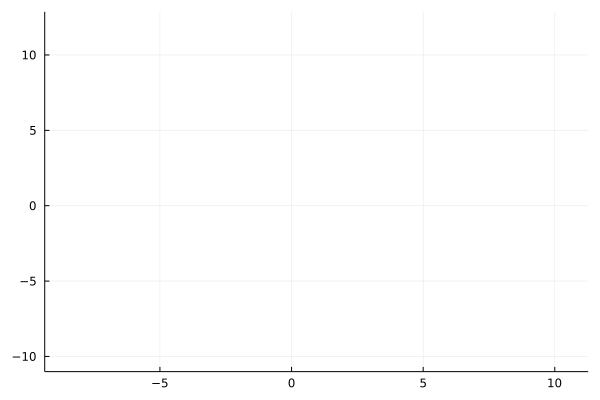

Arrays have incorrect length or dimension.
Arrays have incorrect length or dimension.
Arrays have incorrect length or dimension.


In [10]:
ccol = cgrad([RGB(1,.3,.3), RGB(.4,1,.4)])
mcol = [RGB(1,.1,.1) RGB(.3,1,.3)]
m = [:rect :circle]

data = [ i + j for i=1:15, j=1:15 ]
scatter(xData[1,:], xData[2,:],group=yData[:])
contour(xData[1,:], xData[2,:], data, f=true, nlev=3, c=ccol, leg=:none)


   

In [75]:
data = collect(Iterators.product(1:15, 1:15))
[model([d[1], d[2]]).data for d in data]

15×15 Matrix{Vector{Float64}}:
 [0.432562]     [0.432562]     [0.432562]     …  [0.432562]     [0.432562]
 [0.432562]     [0.432562]     [0.432562]        [0.432562]     [0.432562]
 [0.432562]     [0.432562]     [0.432562]        [0.432562]     [0.432562]
 [0.468804]     [0.471926]     [0.475051]        [0.509502]     [0.512635]
 [0.628657]     [0.631578]     [0.63449]         [0.665838]     [0.668621]
 [0.764564]     [0.766813]     [0.769047]     …  [0.792626]     [0.794679]
 [0.861675]     [0.863162]     [0.864636]        [0.837889]     [0.831686]
 [0.472518]     [0.461323]     [0.450167]        [0.304182]     [0.292148]
 [0.0382475]    [0.0359988]    [0.0338776]       [0.0172464]    [0.0162116]
 [0.00150905]   [0.00141714]   [0.00133083]      [0.000666474]  [0.000625851]
 [5.7432e-5]    [5.39294e-5]   [5.05643e-5]   …  [2.45959e-5]   [2.30362e-5]
 [1.91505e-6]   [1.7936e-6]    [1.67986e-6]      [8.1711e-7]    [7.65291e-7]
 [6.3619e-8]    [5.95845e-8]   [5.58058e-8]      [2.71448e-8]